<a href="https://colab.research.google.com/github/sakshamkhatri7/Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Fuel_cell_performance_data-Full.csv to Fuel_cell_performance_data-Full.csv


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
data = pd.read_csv('Fuel_cell_performance_data-Full.csv')

# Selecting features and the target
X = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4', 'Target5'])
y = data['Target4']

In [4]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into 70/30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    })


In [6]:
# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Save results to a CSV file for submission
results_df.to_csv('model_performance_results.csv', index=False)

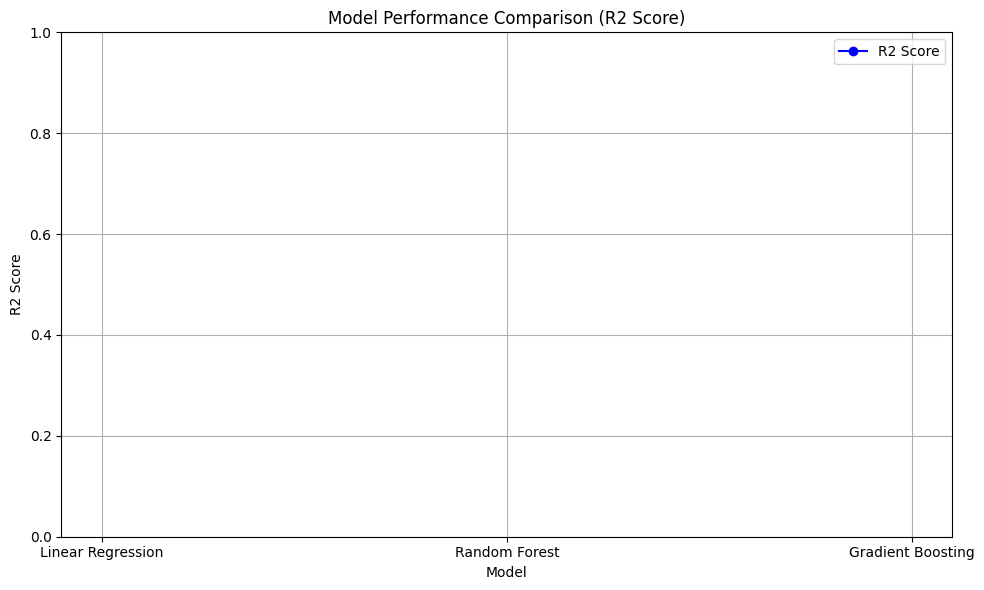

               Model       MAE       MSE      RMSE  R2 Score
0  Linear Regression  1.894642  4.899193  2.213412 -0.016989
1      Random Forest  1.910980  5.078464  2.253545 -0.054203
2  Gradient Boosting  2.021070  5.480339  2.341012 -0.137626


In [7]:
# Visualization: Line Plot for R2 Score
plt.figure(figsize=(10, 6))
plt.plot(results_df["Model"], results_df["R2 Score"], marker='o', linestyle='-', color='b', label='R2 Score')
plt.title("Model Performance Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("model_performance_r2_score.png")  # Save the plot
plt.show()

# Print results for quick verification
print(results_df)